In [1]:
import os, sys
import copy

import numpy as np
import healpy as hp
from tqdm import *

import matplotlib.pyplot as plt
import matplotlib

# NPTFit modules
from NPTFit import nptfit
from NPTFit import create_mask as cm

In [2]:
nside = 128
npix = hp.nside2npix(nside)
xt_a = np.logspace(np.log10(1e-30), np.log10(1e-26), 20)

In [3]:
exp_a = np.ones(npix)
stemp_a = np.ones(npix)
mask_a = np.array(cm.make_mask_total(band_mask = False))

In [4]:
iso = 10*np.ones(npix)
data_at = iso.astype(np.int32)

n = nptfit.NPTF('test')
n.load_data(data_at, exp_a)
n.load_mask(mask_a)
n.add_template(iso, 'iso', units='counts')
n.add_poiss_model('iso', 'A', [0,20], False)

n.add_template(copy.deepcopy(stemp_a), "subs", units='PS')
n.add_non_poiss_model( 'subs', 
                       ['$A$','$n_1$','$n_2$', '$n_3$', '$S_b1$', '$S_b2$'],
                       [[1e-10, 1e-1],[2.05, 10],[-3, 3],[-10, 1.95],[0.1, 100],[0.1,1]],
                       [False,False,False, False, False, False],
                       'specify_relative_breaks')

n.configure_for_scan()
ll = n.ll

The number of parameters to be fit is 7


In [5]:
def get_ll_arr(SCDp_a, xsec_scale):
    ll_arr = []
    for ix, xt in enumerate(xt_a):
        fac_t = xt/xsec_scale
        SCD = SCDp_a * np.array([1/fac_t, 1, 1, 1, fac_t, 1])
        ll_arr.append(ll( np.concatenate(([1], SCD)) ))
    return np.array(ll_arr)

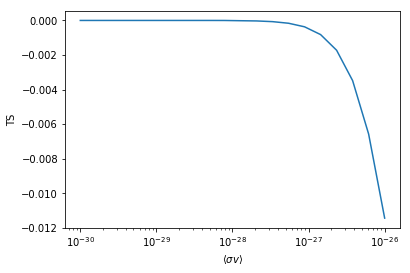

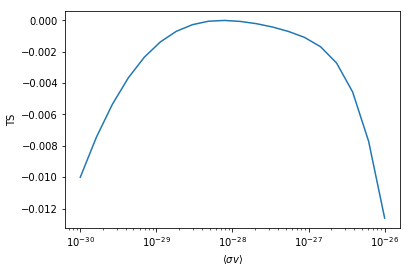

In [6]:
SCDp_a = [ 4e-13, 3, 1.5, -1, 6e+4, 7e-4]

ll_arr = get_ll_arr(SCDp_a, 1e-22)

plt.plot(xt_a, 2*(ll_arr-max(ll_arr)))
plt.xscale("log"); plt.ylabel("TS"); plt.xlabel("$\\langle \\sigma v \\rangle$")
plt.show()

SCDp_a = [ 4e-13, 3, 1.499, -1, 6e+4, 7e-4]
ll_arr = get_ll_arr(SCDp_a, 1e-22)
plt.plot(xt_a, 2*(ll_arr-max(ll_arr)))
plt.xscale("log"); plt.ylabel("TS"); plt.xlabel("$\\langle \\sigma v \\rangle$");
plt.show()